In [1]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens
from matplotlib.pyplot import *
fig_kwargs = {'ylabsize':18,'xticks_labsize':16,'yticks_labsize':16,'legend_size':16}

In [2]:
pobj = {}
qobj = {}
for ntype in ['base','goal']:
    pobj[ntype] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
    qobj[ntype] = tools_lens.init_qobj(pobj[ntype].stag,doreal=False,rlmin=300,rlmax=4096,n0max=50)

In [5]:
al, n0, ml = {}, {}, {}
for ntype in ['base','goal']:
    for q in ['TT','TE','EE','EB','MV']:
        al[ntype+q] = (np.loadtxt(qobj[ntype].f[q].al)).T[1]
        #n0[ntype+q] = (np.loadtxt(qobj[ntype].f[q].n0bs)).T[1]
        #ml[ntype+q] = (np.loadtxt(qobj[ntype].f[q].ml[1])).T[1]

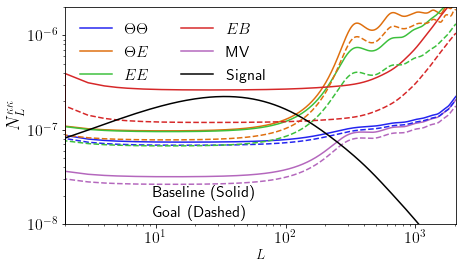

In [10]:
pl.plot_1dstyle(fsize=[7,4],ylab='$N_L^{\kappa\kappa}$',usetex=True,xmin=2,xmax=2048,xlog=True,ylog=True,ymin=1e-8,ymax=2e-6,**fig_kwargs)
co = rcParams['axes.prop_cycle'].by_key()['color']
l = qobj['base'].l
for ntype in ['base','goal']:
    for i, (q, lab) in enumerate(zip(['TT','TE','EE','EB','MV'],[r'$\Theta\Theta$',r'$\Theta E$','$EE$','$EB$','MV'])):
        if ntype == 'base': plot(l,al[ntype+q],color=co[i],ls='-',label=lab)
        if ntype == 'goal': plot(l,al[ntype+q],color=co[i],ls='--')
figtext(0.3,0.22,'Baseline (Solid)',fontsize=16)
figtext(0.3,0.15,'Goal (Dashed)',fontsize=16)
plot(pobj['base'].l,pobj['base'].kk,'k',label='Signal')
legend(loc=0,ncol=2)
savefig('fig_lens_noise.pdf')